#Exploration Data & Data Processing

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt,ExponentialSmoothing

In [13]:
harga_saham=[7043.938965, 7091.76123, 7056.040039, 7098.890137, 7052.303223, 7015.689941,
             7034.573242, 7045.526855, 7102.395996, 7050.125977, 7070.083984, 6966.836914,
             7089.206055, 7019.39209, 7035.5, 7014.383789, 7044.98584, 7082.181152,
             7063.24707, 7030.587891, 7054.123047, 7080.515137, 7053.149902, 7017.35791,
             7012.068848, 7081.312988, 7020.803223, 7019.63916, 6987.328125, 6892.569824,
             6818.751953, 6804.227051, 6715.118164, 6734.452148, 6810.315918, 6801.749023,
             6751.859863, 6812.192871, 6779.698242, 6768.315918, 6820.663086, 6824.432129,
             6800.672852, 6835.808105, 6923.026855, 6850.52002, 6860.077148, 6850.619141,
             6850.983887, 6888.757813, 6813.23877, 6653.84082, 6684.558105, 6688.265137,
             6622.499023, 6584.453125, 6629.934082, 6641.830078, 6688.057129, 6767.339844,
             6765.786133, 6819.907227, 6874.931152, 6860.854004, 6829.930176, 6864.817871,
             6898.980957, 6872.480957, 6839.341797, 6862.257813, 6890.571777, 6911.731934,
             6873.791016, 6935.300781, 6940.124023, 6897.365234, 6880.329102, 6900.140137,
             6941.85498, 6914.538086, 6895.664063, 6895.713867, 6894.716797, 6873.404785,
             6809.967773, 6839.454102, 6856.576172, 6854.776855, 6843.23877, 6844.936035,
             6857.415039, 6813.63623, 6807.000977, 6766.757813, 6776.370117, 6799.794922,
             6765.301758, 6786.955078, 6641.813965, 6628.137207, 6565.728027, 6678.236816,
             6612.490234, 6691.61084, 6762.253906, 6708.933105, 6760.328125, 6839.436035,
             6808.951172, 6805.276855, 6827.174805, 6833.178223, 6819.674805, 6792.765137,
             6771.234863, 6811.313965, 6798.963867, 6785.598145, 6818.574219, 6787.582031,
             6821.807129, 6910.146973, 6945.477051, 6915.71582, 6863.301758, 6812.722168,
             6844.026855, 6787.630859, 6769.630859, 6779.97998, 6811.904785, 6755.937988,
             6707.763184, 6711.740234, 6676.563965, 6663.11377, 6700.561035, 6729.646973,
             6736.684082, 6745.804199, 6704.230957, 6687.000977, 6681.102051, 6636.422852]

In [15]:
index= pd.date_range(start='11/1/2022', end='5/31/2023', freq='D')
saham = pd.Series(harga_saham)

In [16]:
index

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', length=212, freq='D')

In [17]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

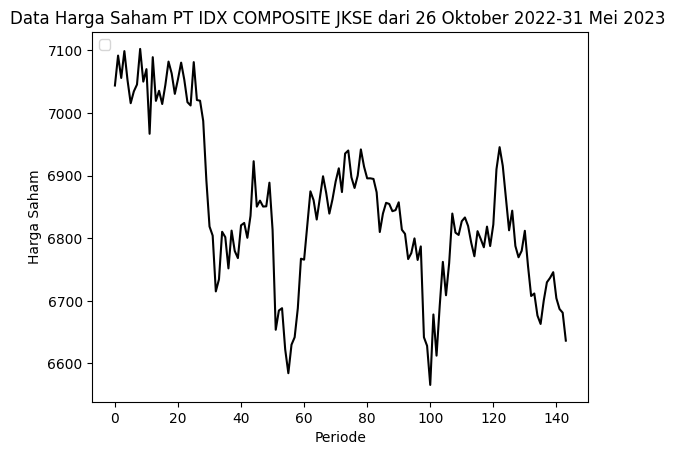

In [25]:
plt.plot(saham, color='black')
plt.xlabel('Periode')
plt.ylabel('Harga Saham')
plt.title('Data Harga Saham PT IDX COMPOSITE JKSE dari 26 Oktober 2022-31 Mei 2023 ')
plt.legend(loc=2)

#**Double Exponential Smoothing Holt**

In [19]:
fit1 = Holt(saham).fit()
fcast1 = fit1.forecast(10).rename("Holt's linear trend")
print(fit1.summary())

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                  144
Model:                           Holt   SSE                         324221.528
Optimized:                       True   AIC                           1119.589
Trend:                       Additive   BIC                           1131.468
Seasonal:                        None   AICC                          1120.202
Seasonal Periods:                None   Date:                 Mon, 26 Jun 2023
Box-Cox:                        False   Time:                         09:30:43
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8069609                alpha                 True
smoothing_trend            0.0974656                

In [20]:
fit1.fittedvalues

0      7047.016308
1      7047.881992
2      7090.090942
3      7066.735183
4      7099.333977
          ...     
139    6730.260517
140    6741.472501
141    6707.159791
142    6685.046666
143    6675.707517
Length: 144, dtype: float64

In [21]:
print(fcast1)

144    6634.760555
145    6625.514780
146    6616.269005
147    6607.023231
148    6597.777456
149    6588.531681
150    6579.285906
151    6570.040131
152    6560.794356
153    6551.548582
Name: Holt's linear trend, dtype: float64


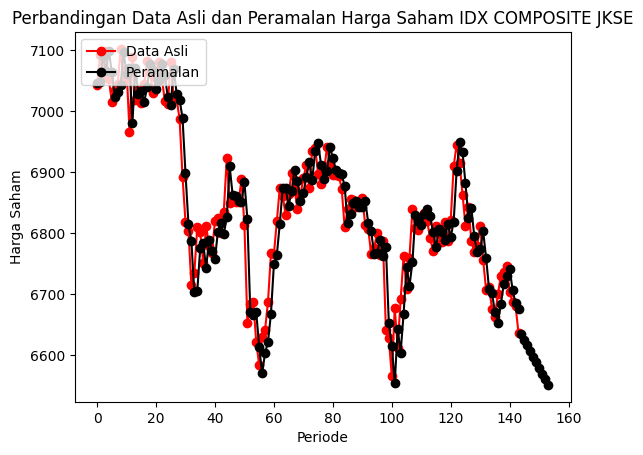

In [24]:
plt.title('Perbandingan Data Asli dan Peramalan Harga Saham IDX COMPOSITE JKSE')
plt.xlabel('Periode')
plt.ylabel('Harga Saham')
# Actual data
plt.plot(saham, label='Data Asli',color='red',marker='o')
# Holt's Linear Trend
plt.plot(fcast1,label='Peramalan',color='black',marker='o')
plt.plot(fit1.fittedvalues,color='black',marker='o')
plt.legend(loc=2)

#**Menghitung Nilai Mape**

In [23]:
def mape(actual, pred):
 actual, pred = np.array(actual), np.array(pred)
 mape = np.mean(np.abs((actual - pred)/harga_saham))*100
 return mape
actual = harga_saham
pred = fit1.fittedvalues
print('mape :', mape(harga_saham, fit1.fittedvalues))

mape : 0.546301238504613
